In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import bokeh
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)


In [114]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/pollution_us_2000_2016.csv"
df = pd.read_csv(csv_path)

state_csv_path = "Resources/State_2016.csv"
state_2016_df = pd.read_csv(state_csv_path)

In [120]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
df['year'] = pd.DatetimeIndex(df['Date Local']).year
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d') 

In [121]:
# Delete extraneous column
df = df.drop(['Unnamed: 0','State Code','County Code','Address','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units'], axis=1)
# Removing Mexico
df = df[df.State!='Country Of Mexico']
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [122]:
df.State.unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [123]:
df_grouped = df.groupby(['State','Date Local']).mean()
df_grouped.head()

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI  \
State   Date Local                                                            
Alabama 2013-12-01  17.208333               39.3              18.0     37.0   
        2013-12-02  20.687500               32.4               7.0     30.0   
        2013-12-03  14.912500               22.4              17.0     21.0   
        2013-12-04   7.825000               19.3              17.0     18.0   
        2013-12-05   8.004762               16.0               7.0     15.0   

                     O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.013542             0.026              9.0    24.0   
        2013-12-02  0.009375             0.013              0.0    12.0   
        2013-12-03  0.008167             0.012             22.0    11.0   
        2013-12-04  0.011125             0.014              8.0    13.0   
        2013-12-05  0.010083             0.014             18.0    13.0   

                    SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  SO2 AQI  \
State   Date Local                                                           
Alabama 2013-12-01  0.285390               0.75              11.0      1.0   
        2013-12-02  0.531666               2.10              11.0      3.0   
        2013-12-03  0.252632               1.35              12.5      3.0   
        2013-12-04  0.123052               0.95              17.0      1.0   
        2013-12-05 -0.014285               0.60               2.5      1.0   

                     CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.262879             0.650              8.5     6.0   
        2013-12-02  0.352812             0.485              8.0     6.0   
        2013-12-03  0.237575             0.325              4.0     3.0   
        2013-12-04  0.115152             0.220             18.5     2.0   
        2013-12-05  0.117575             0.200             17.5     2.0   

                      year  
State   Date Local          
Alabama 2013-12-01  2013.0  
        2013-12-02  2013.0  
        2013-12-03  2013.0  
        2013-12-04  2013.0  
        2013-12-05  2013.0

In [124]:
#NO2 data
NO2_data = df[["State","Date Local","NO2 Mean","NO2 1st Max Value", "NO2 1st Max Hour", "NO2 AQI","year"
                          ]]
NO2_data.head()

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,year
0,Arizona,2000-01-01,19.041667,49.0,19,46,2000
1,Arizona,2000-01-01,19.041667,49.0,19,46,2000
2,Arizona,2000-01-01,19.041667,49.0,19,46,2000
3,Arizona,2000-01-01,19.041667,49.0,19,46,2000
4,Arizona,2000-01-02,22.958333,36.0,19,34,2000


In [125]:
df_c = NO2_data.sort_values('State')
df_c = NO2_data.sort_values('NO2 Mean')
df_c.head()

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,year
1294684,Oklahoma,2012-05-29,-2.0,-2.0,0,0,2012
1294686,Oklahoma,2012-05-29,-2.0,-2.0,0,0,2012
1294687,Oklahoma,2012-05-29,-2.0,-2.0,0,0,2012
1294683,Oklahoma,2012-05-28,-2.0,-2.0,0,0,2012
1294682,Oklahoma,2012-05-28,-2.0,-2.0,0,0,2012


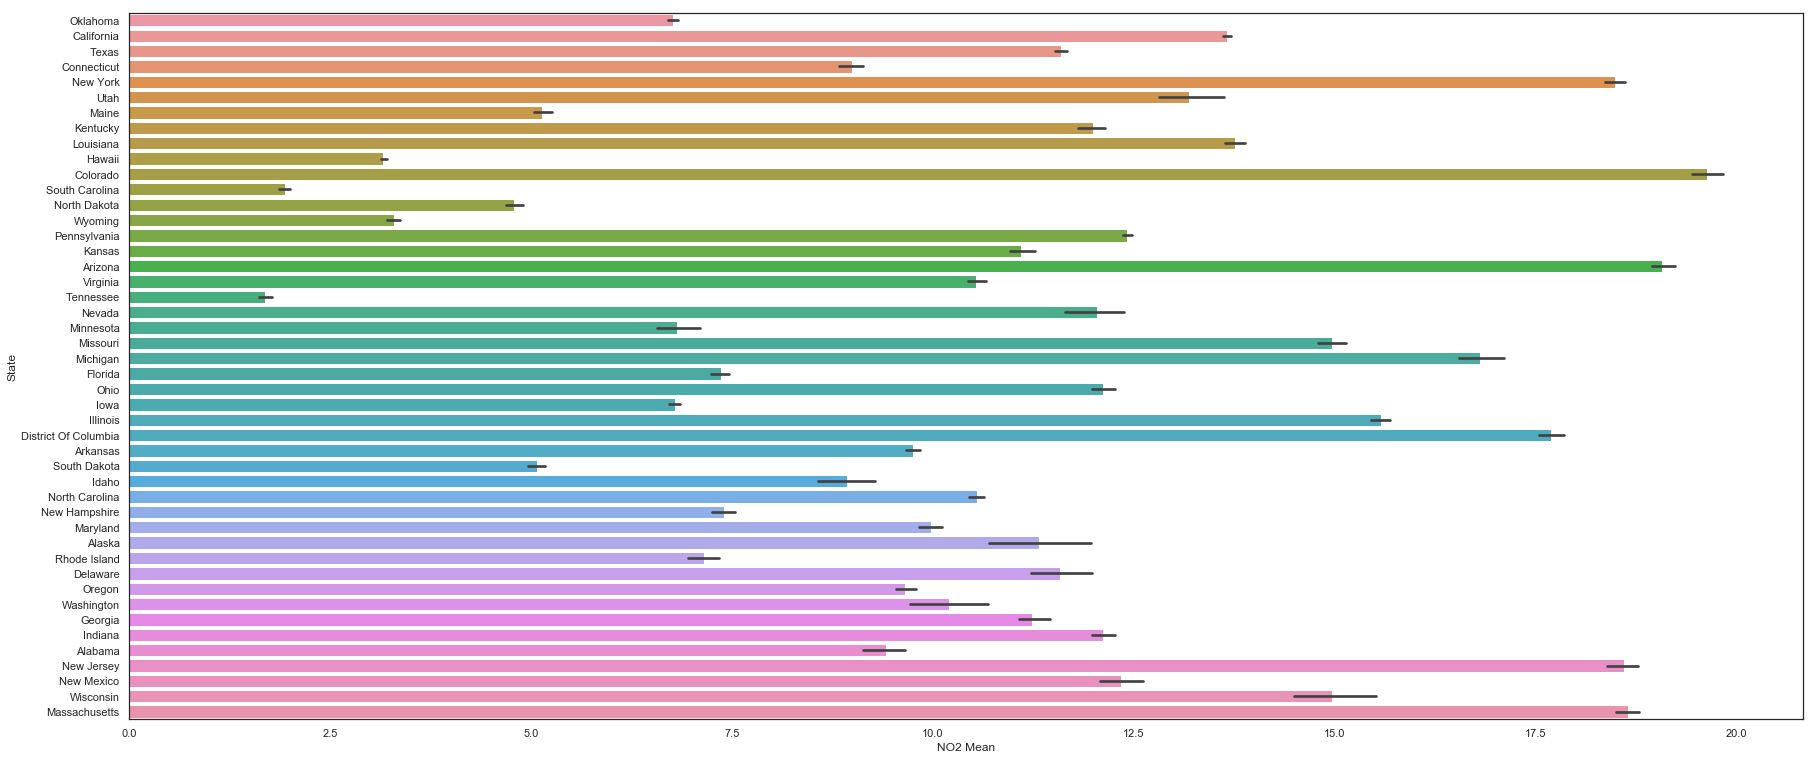

In [126]:
#Now we are ready to create some data visualizations
#This seaborn barplot shows the mean NO2 levels for each state
ax = sns.barplot(x="NO2 Mean",y="State", data=df_c, ci=100)
#ax = sns.sort_values(by='NO2 Mean',ascending=False)
fig = plt.gcf()
fig.set_size_inches(30, 13)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("NO2_Levels_For_Each_State.png", bbox_inches="tight")

In [48]:
#O3 data

O3_data = df[["State", "County", "City","O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI"
                          ]]
O3_data.head()

,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI
0,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
1,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
2,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
3,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
4,Arizona,Maricopa,Phoenix,0.013375,0.032,10,27


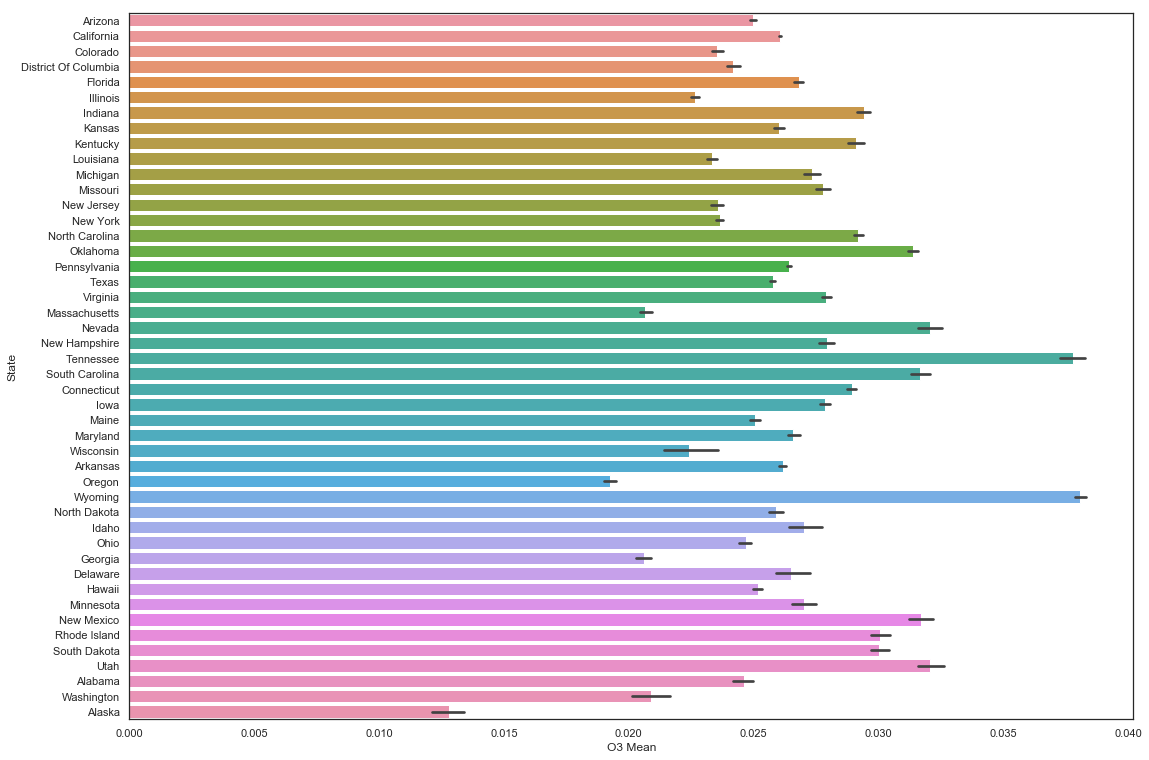

<Figure size 432x288 with 0 Axes>

In [50]:
#Repeat this step for the O3 Mean
ax = sns.barplot(x="O3 Mean",y="State", data=O3_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)
plt.show()

plt.savefig("O3_Levels_For_Each_State.png", bbox_inches="tight")

In [51]:
#SO2 data
SO2_data = df[["State","County", "City","SO2 Mean","SO2 1st Max Value", "SO2 1st Max Hour", "SO2 AQI","Date Local","year"
                   ]]
SO2_data.head()

,State,County,City,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,3.000000,9.0,21,13.0,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,3.000000,9.0,21,13.0,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,2.975000,6.6,23,NaN,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,2.975000,6.6,23,NaN,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,1.958333,3.0,22,4.0,2000-01-02,2000


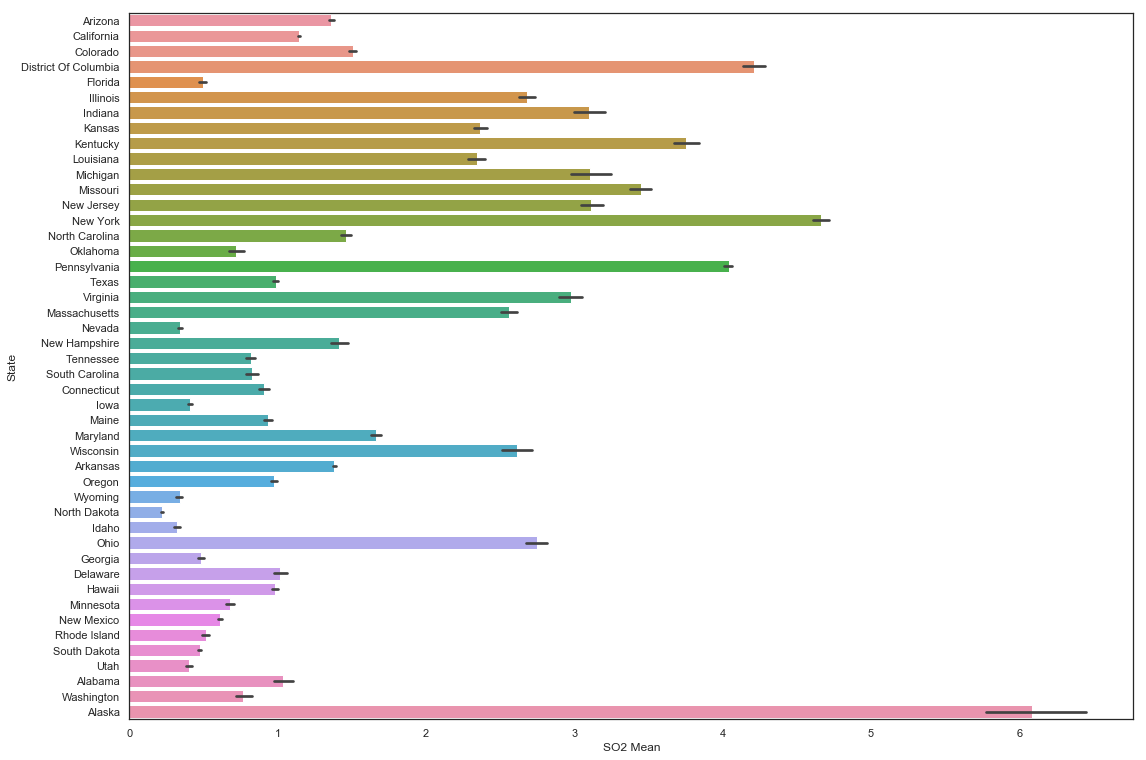

In [53]:
#Now we will plot the SO2 Mean with the same graph to show differences in pollutant levels
ax = sns.barplot(x="SO2 Mean",y="State", data=SO2_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)

plt.savefig("SO2_Levels_For_Each_State.png", bbox_inches="tight")

In [54]:
#CO data
CO_data = df[["State", "County", "City","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI", "Date Local","year"
                  ]]
CO_data.head()


,State,County,City,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,1.145833,4.2,21,NaN,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,0.878947,2.2,23,25.0,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,1.145833,4.2,21,NaN,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,0.878947,2.2,23,25.0,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,0.850000,1.6,23,NaN,2000-01-02,2000


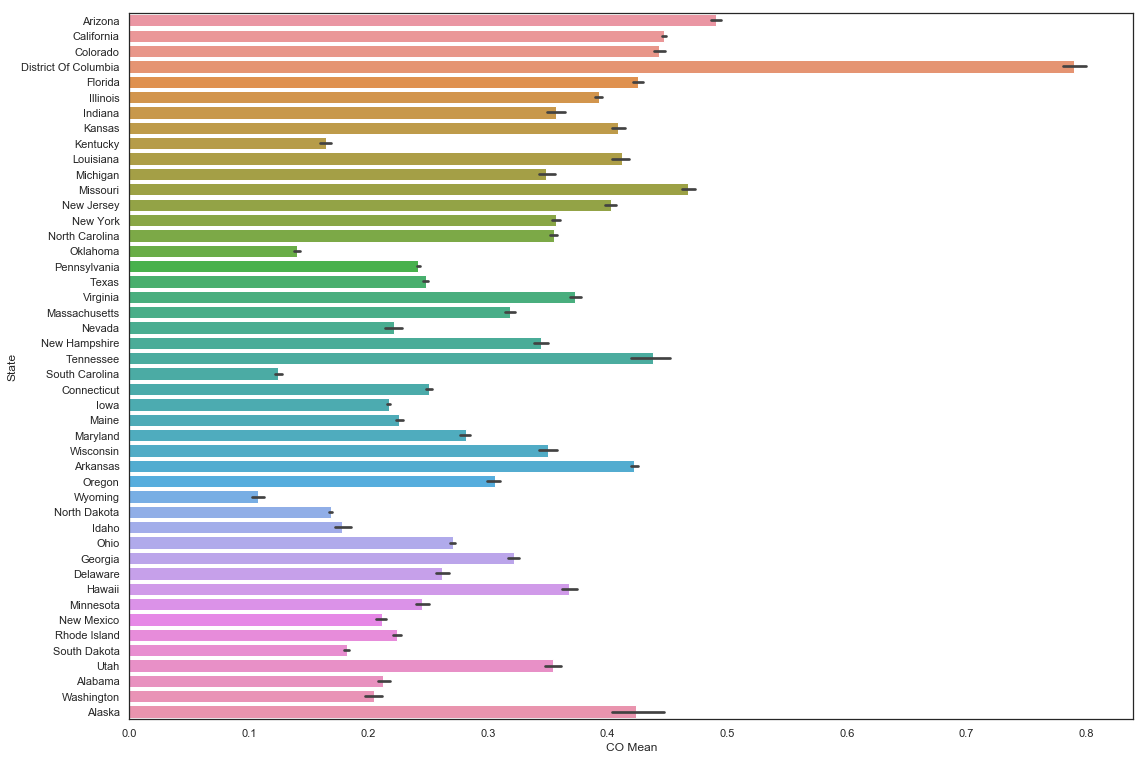

In [55]:
#Now we will plot the CO Mean with the same graph to show differences in pollutant levels
ax = sns.barplot(x="CO Mean",y="State", data=CO_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)

plt.savefig("CO_Levels_For_Each_State.png", bbox_inches="tight")

In [56]:
dff_group = df.groupby(["State"]).mean()

dff_group.head()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
State,,,,,,,,,,,,,,,,,
Alabama,9.410693,22.969098,13.158029,21.232246,0.024612,0.038434,9.293026,36.845170,1.034236,4.230198,10.756238,7.005115,0.212607,0.407386,9.446257,3.850288,2014.725528
Alaska,11.313152,21.046910,12.218845,19.553191,0.012799,0.019116,10.341439,17.725431,6.083755,9.659372,9.983789,14.487335,0.423438,0.677599,10.138804,6.528340,2014.637285
Arizona,19.067975,38.398603,14.230985,36.106987,0.024989,0.043125,10.122022,39.004095,1.364213,2.728664,10.247938,4.213486,0.490616,0.982476,9.511755,9.191023,2007.698024
Arkansas,9.753701,23.094102,12.160195,21.486471,0.026169,0.038766,10.046983,35.035662,1.383302,2.272116,10.036115,2.975773,0.422393,0.558514,7.939375,5.929914,2011.673610
California,13.651894,25.592142,11.264417,24.110238,0.026053,0.038820,10.204474,35.722673,1.146695,2.331772,8.508692,3.598278,0.447485,0.769284,7.430949,7.405669,2007.483221


In [58]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [59]:
#drop unwanted columns
data = df.drop(['County','City',
                'NO2 1st Max Value','NO2 1st Max Hour',
                'O3 1st Max Value',
                'SO2 1st Max Value','SO2 1st Max Hour',
                'CO 1st Max Value','CO 1st Max Hour','year'], axis=1)
data.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,1.145833,NaN
1,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,1.145833,NaN
3,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34,0.013375,10,27,1.958333,4.0,0.850000,NaN


/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


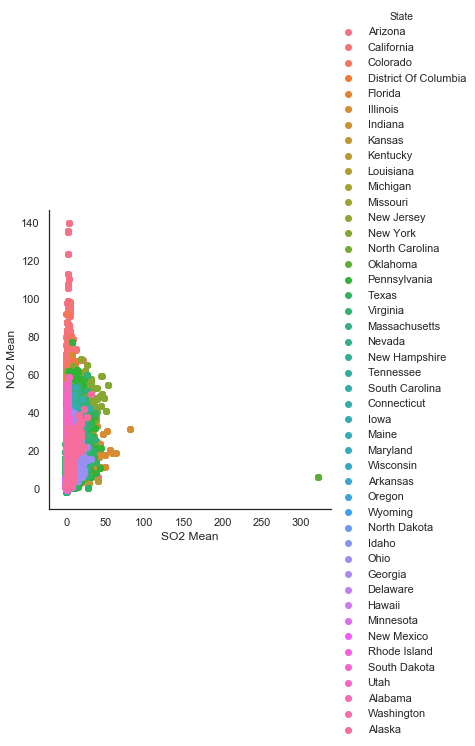

<Figure size 432x288 with 0 Axes>

In [67]:
#To create a seaborn plot using NO2 Mean and SO2 Mean Data
sns.FacetGrid(data, hue="State", size=5) \
   .map(plt.scatter, "SO2 Mean", "NO2 Mean") \
   .add_legend()
plt.show()

plt.savefig("SO2_Vs_NO2_byState.png", bbox_inches="tight")

/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


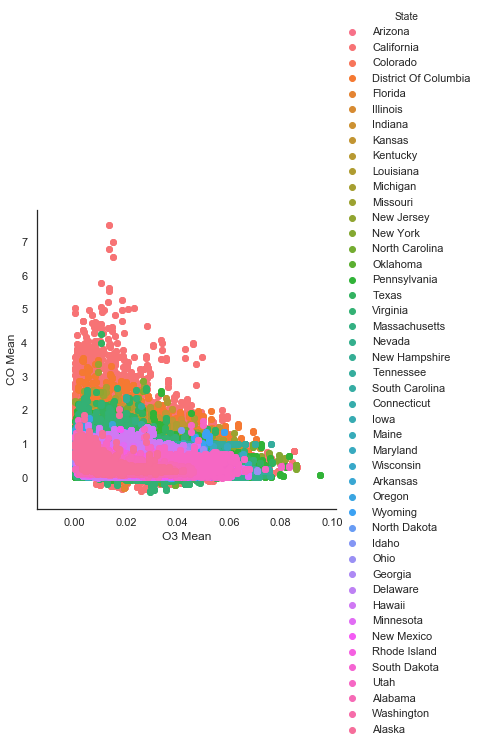

<Figure size 432x288 with 0 Axes>

In [68]:
#To create a seaborn plot using NO2 Mean and SO2 Mean Data
sns.FacetGrid(data, hue="State", size=5) \
   .map(plt.scatter, "O3 Mean", "CO Mean") \
   .add_legend()
plt.show()

plt.savefig("O3_Vs_CO_byState.png", bbox_inches="tight")

In [69]:
len(df.State.unique())

46

In [70]:
## Prepare all 4 AQIs against state and date 

df_State = df[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]

df_State.head()



,State,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Arizona,2000-01-01,46,34,13.0,NaN
1,Arizona,2000-01-01,46,34,13.0,25.0
2,Arizona,2000-01-01,46,34,NaN,NaN
3,Arizona,2000-01-01,46,34,NaN,25.0
4,Arizona,2000-01-02,34,27,4.0,NaN


In [72]:
pollSt = df_State.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollSt.head()

NO2 AQI  O3 AQI  SO2 AQI  CO AQI
State   Date Local                                  
Alabama 2013-12-01     37.0    24.0      1.0     6.0
        2013-12-02     30.0    12.0      3.0     6.0
        2013-12-03     21.0    11.0      3.0     3.0
        2013-12-04     18.0    13.0      1.0     2.0
        2013-12-05     15.0    13.0      1.0     2.0

In [73]:
pollStGrouped = pollSt.groupby(level=0)
pollStGrouped

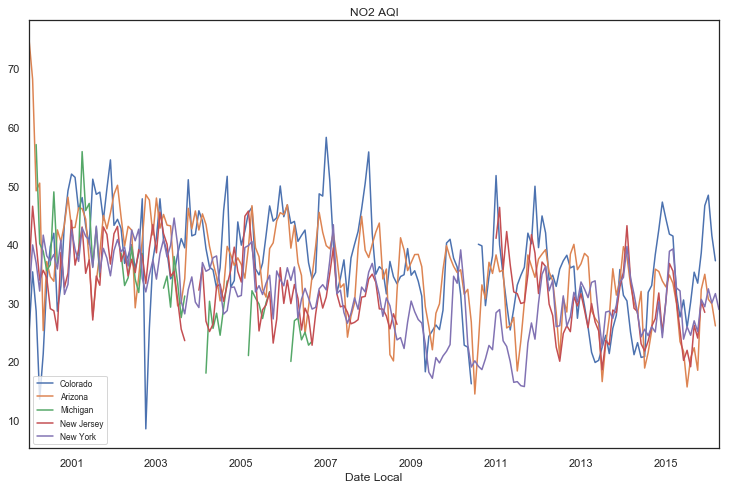

In [82]:
plt.figure(figsize=(20,13))

# NO2 AQI
plt.subplot(221)
pollNO2 = pollStGrouped['NO2 AQI']
pollNO2Top = pollNO2.mean().nlargest(5).index
for i in range(len(pollNO2Top)):
    pollNO2.get_group(pollNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollNO2Top,loc=3,fontsize='small')
plt.title('NO2 AQI')

plt.savefig("NO2Trend_ByYears.png", bbox_inches="tight")

plt.tight_layout()
plt.show()



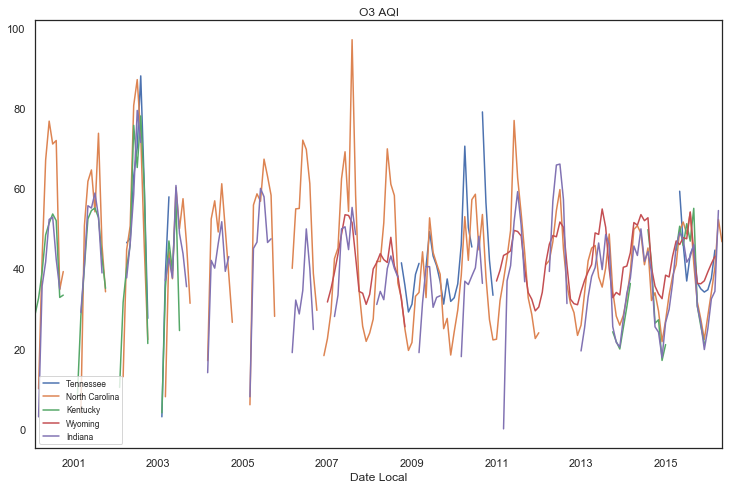

In [83]:
plt.figure(figsize=(20,13))

# O3 AQI
plt.subplot(222)
pollO3 = pollStGrouped['O3 AQI']
pollO3Top = pollO3.mean().nlargest(5).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.title('O3 AQI')

plt.savefig("O3Trend_ByYears.png" , bbox_inches="tight")

plt.tight_layout()
plt.show()



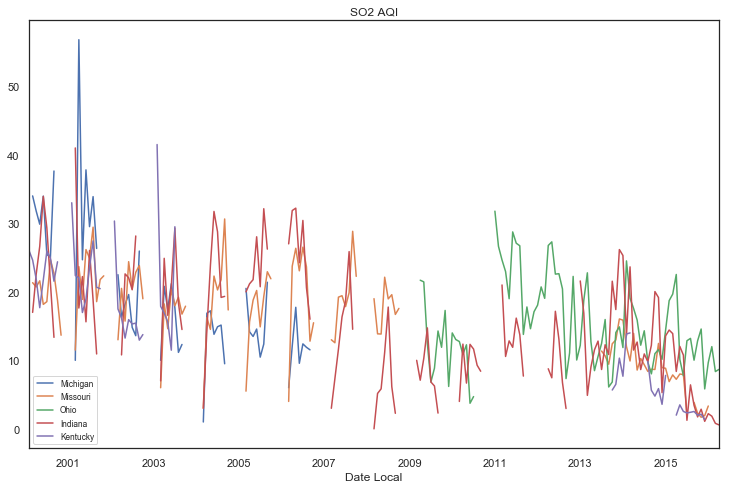

In [84]:
plt.figure(figsize=(20,13))

# SO2 AQI
plt.subplot(223)
pollSO2 = pollStGrouped['SO2 AQI']
pollSO2Top = pollSO2.mean().nlargest(5).index
for i in range(len(pollSO2Top)):
    pollSO2.get_group(pollSO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollSO2Top,loc=3,fontsize='small')
plt.title('SO2 AQI')

plt.savefig("SO2Trend_ByYears.png" , bbox_inches="tight")

plt.tight_layout()
plt.show()


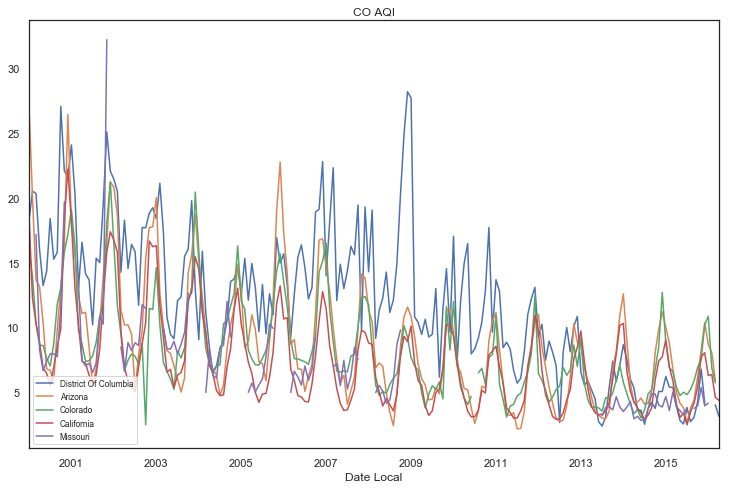

In [85]:
plt.figure(figsize=(20,13))

# CO AQI
plt.subplot(224)
pollCO = pollStGrouped['CO AQI']
pollCOTop = pollCO.mean().nlargest(5).index
for i in range(len(pollCOTop)):
    pollCO.get_group(pollCOTop[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollCOTop,loc=3,fontsize='small')
plt.title('CO AQI')

plt.tight_layout()
plt.show()

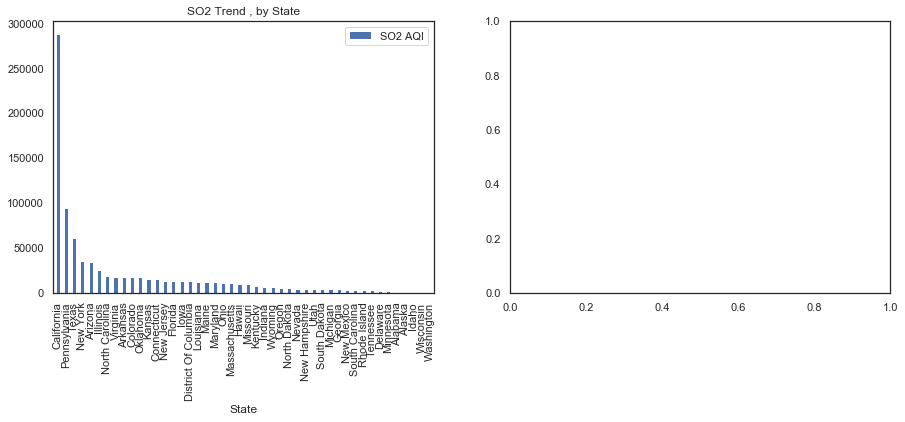

In [90]:
f , ax = plt.subplots(1,2, figsize=[15,5])
#f, ax = plt.subplots(figsize=[20,6])
df_State[['SO2 AQI','State']].groupby(["State"]).count()\
.sort_values(by='SO2 AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("SO2 Trend , by State")

plt.savefig("SO2Trend_ByState_Orderby.png" , bbox_inches="tight")

plt.show()

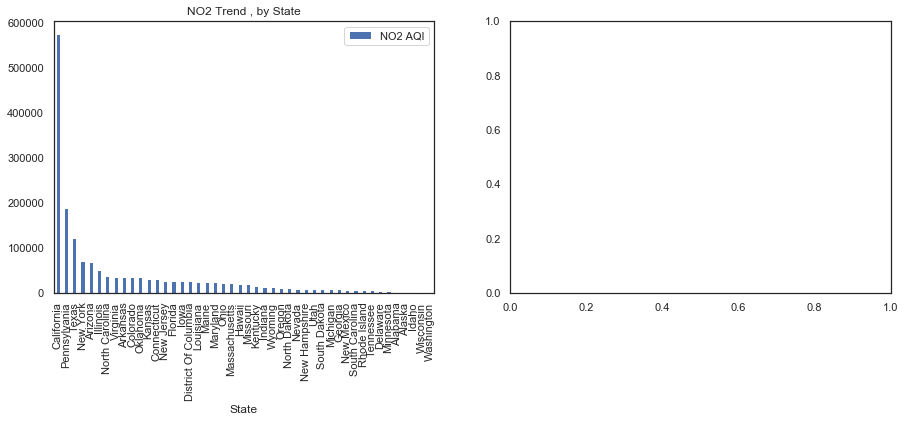

In [91]:
f , ax = plt.subplots(1,2, figsize=[15,5])
#f, ax = plt.subplots(figsize=[20,6])
df_State[['NO2 AQI','State']].groupby(["State"]).count()\
.sort_values(by='NO2 AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("NO2 Trend , by State")

plt.savefig("NO2Trend_ByState_Orderby.png" , bbox_inches="tight")

plt.show()

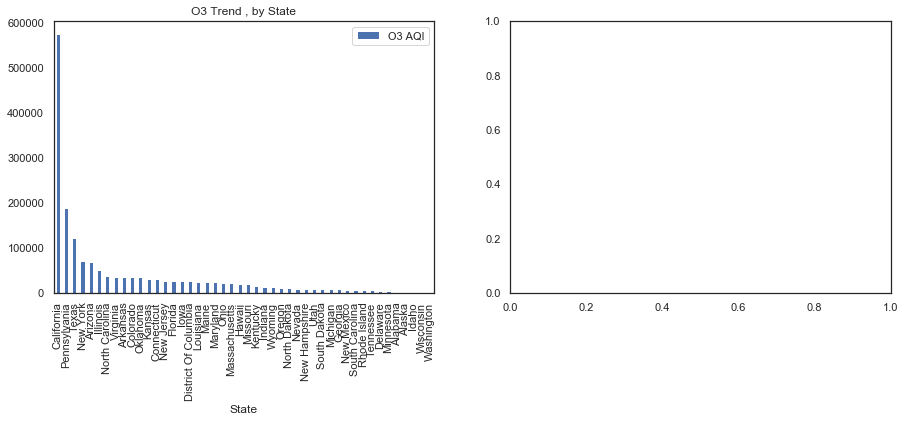

In [92]:
f , ax = plt.subplots(1,2, figsize=[15,5])
#f, ax = plt.subplots(figsize=[20,6])
df_State[['O3 AQI','State']].groupby(["State"]).count()\
.sort_values(by='O3 AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("O3 Trend , by State")

plt.savefig("O3Trend_ByState_Orderby.png" , bbox_inches="tight")

plt.show()

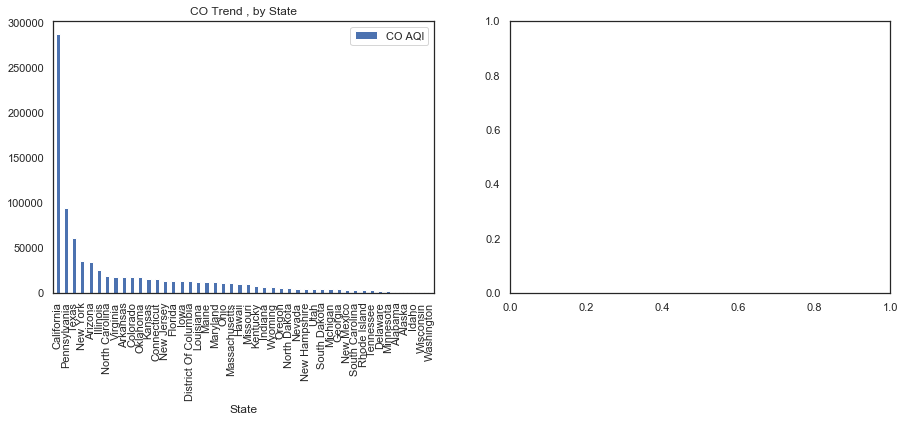

In [93]:
f , ax = plt.subplots(1,2, figsize=[15,5])
#f, ax = plt.subplots(figsize=[20,6])
df_State[['CO AQI','State']].groupby(["State"]).count()\
.sort_values(by='CO AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("CO Trend , by State")

plt.savefig("COTrend_ByState_Orderby.png" , bbox_inches="tight")

plt.show()

/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all alia

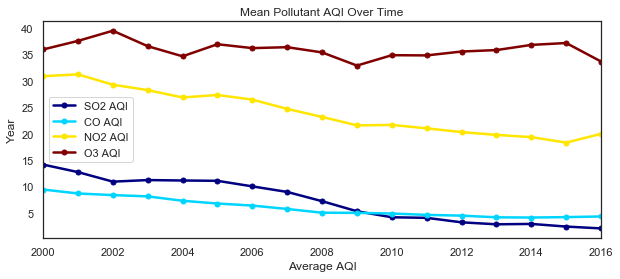

In [97]:
# Plot the aggregate decrease of all pollutants
f, ax = plt.subplots(figsize=[10,4])
df.groupby(['year']).agg({'SO2 AQI': 'mean',
                          'CO AQI': 'mean',
                          'NO2 AQI': 'mean',
                          'O3 AQI': 'mean'})\
.plot(lw=2,colormap='jet',marker='.',markersize=10, ax =ax,linewidth=2.5)
ax.set_title('Mean Pollutant AQI Over Time')

plt.savefig("Mean Pollutant AQI Over Time.png" , bbox_inches="tight")


ax.set(xlabel="Average AQI", ylabel="Year")
plt.show()

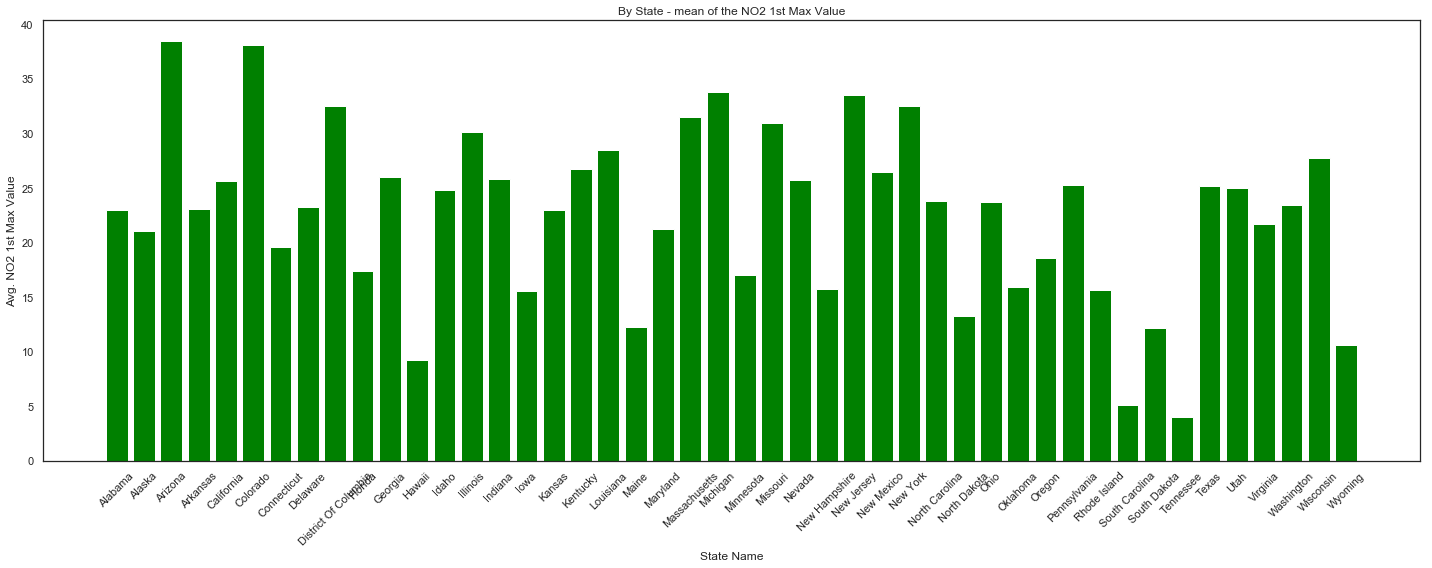

In [102]:
#NO2

states_no2_1st_val = df.groupby(["State"], as_index=False)["NO2 1st Max Value"].mean()

plt.figure(figsize=(20,8))
plt.bar( states_no2_1st_val['State'], states_no2_1st_val['NO2 1st Max Value'], color='green')

plt.xlabel("State Name")
plt.ylabel("Avg. NO2 1st Max Value")
plt.title("By State - mean of the NO2 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)

plt.savefig("By State - mean of the NO2 1st Max Value.png" , bbox_inches="tight")



plt.tight_layout()

plt.show()


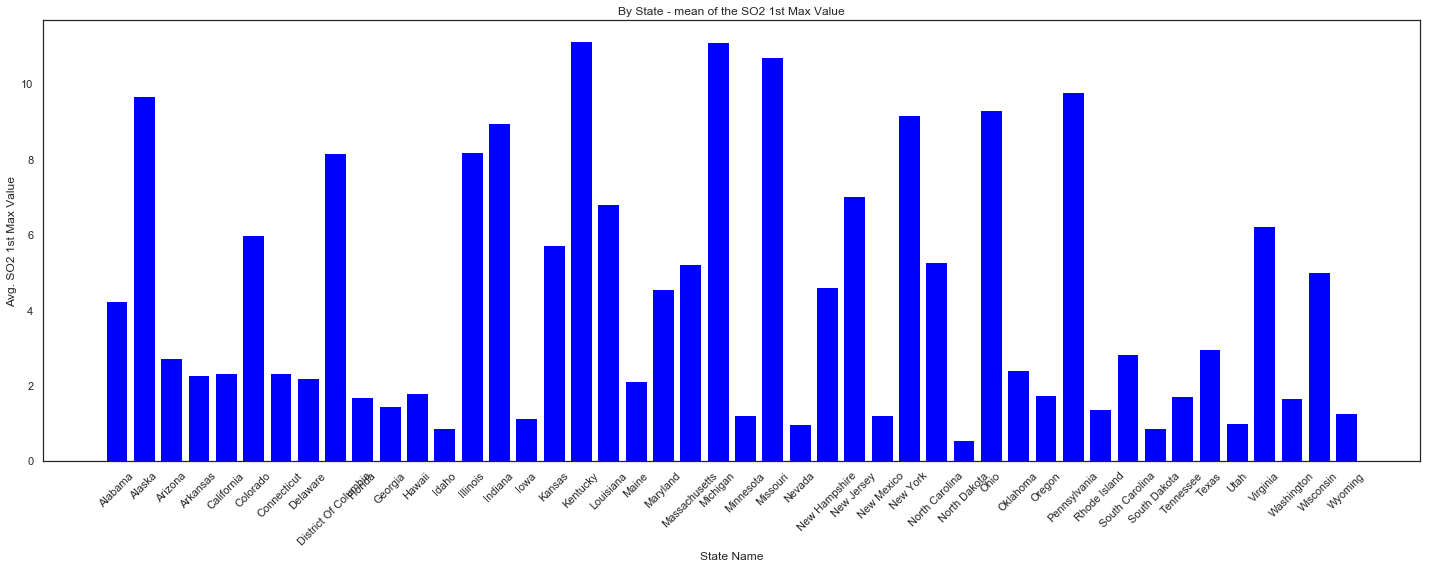

In [104]:
#SO2

states_so2_1st_val = df.groupby(["State"], as_index=False)["SO2 1st Max Value"].mean()

plt.figure(figsize=(20,8))
plt.bar( states_so2_1st_val['State'], states_so2_1st_val['SO2 1st Max Value'], color='blue')

plt.xlabel("State Name")
plt.ylabel("Avg. SO2 1st Max Value")
plt.title("By State - mean of the SO2 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)


plt.savefig("By State - mean of the SO2 1st Max Value.png" , bbox_inches="tight")



plt.tight_layout()

plt.show()





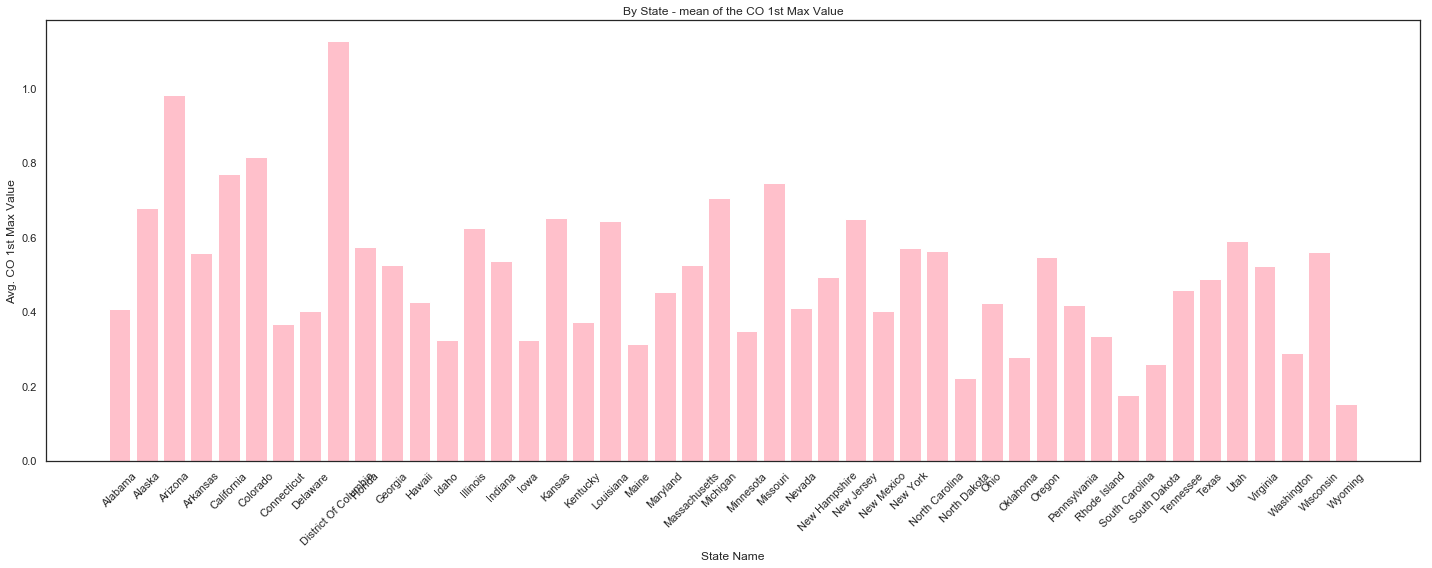

In [105]:
#CO

states_co_1st_val = df.groupby(["State"], as_index=False)["CO 1st Max Value"].mean()

plt.figure(figsize=(20,8))
plt.bar( states_co_1st_val['State'], states_co_1st_val['CO 1st Max Value'], color='pink')

plt.xlabel("State Name")
plt.ylabel("Avg. CO 1st Max Value")
plt.title("By State - mean of the CO 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)

plt.savefig("By State - mean of the CO 1st Max Value.png" , bbox_inches="tight")



plt.tight_layout()

plt.show()


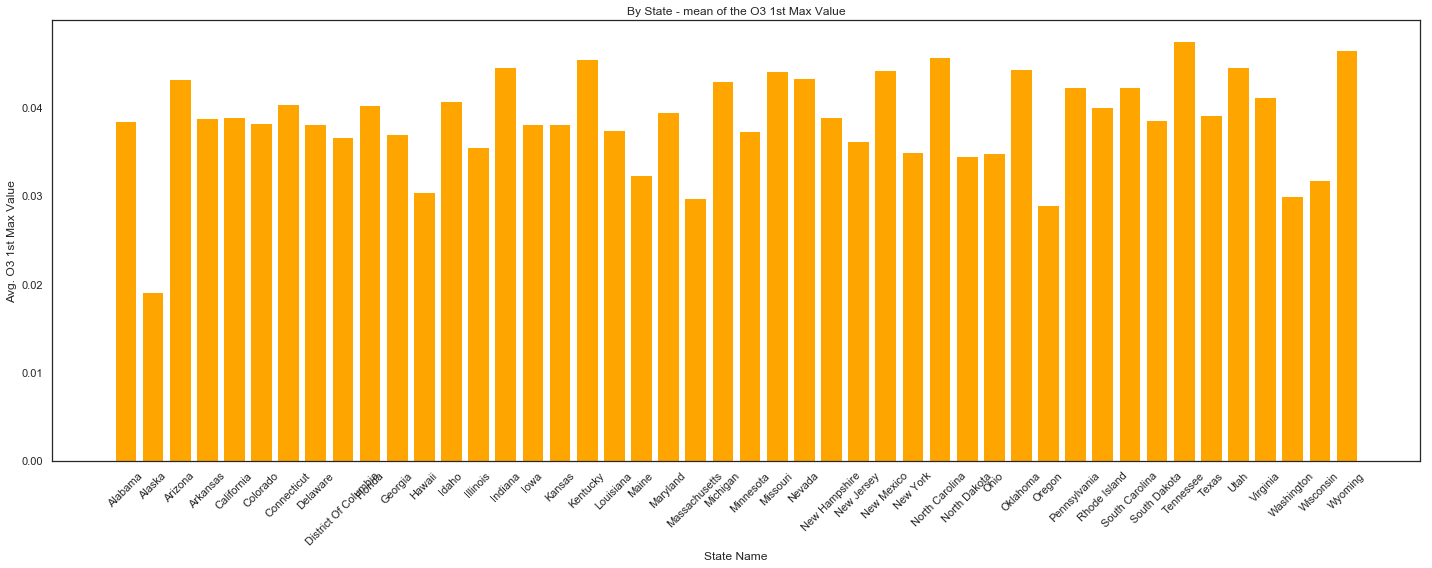

In [106]:
#O3

states_o3_1st_val = df.groupby(["State"], as_index=False)["O3 1st Max Value"].mean()

plt.figure(figsize=(20,8))
plt.bar( states_o3_1st_val['State'], states_o3_1st_val['O3 1st Max Value'], color='orange')

plt.xlabel("State Name")
plt.ylabel("Avg. O3 1st Max Value")
plt.title("By State - mean of the O3 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)

plt.savefig("By State - mean of the O3 1st Max Value.png" , bbox_inches="tight")



plt.tight_layout()

plt.show()




In [107]:
x =df['State']
x.unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [113]:
df.dtypes

State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        int64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                     float64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
CO AQI                      float64
year                          int64
dtype: object

In [115]:
state_2016_df.head()

,State,Population,Area
0,.Alabama,4864745,50750
1,.Arizona,6945452,113642
2,.Arkansas,2990410,52075
3,.California,39209127,155973
4,.Colorado,5540921,103730


In [127]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [128]:
df_16 = df[df.year == 2016]

In [129]:
state_df = df_16.groupby(["State"])
state_16 = state_df[["State","NO2 AQI","O3 AQI", 'SO2 AQI', "CO AQI"
                          ]]

final_16 = state_16.mean()
final_16

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
State,,,,
Alabama,23.093960,39.295302,5.275168,3.906040
Arizona,29.652941,37.370588,1.117647,7.788235
Arkansas,20.274725,32.824176,0.824176,4.637363
California,16.164364,32.900000,1.172965,5.664727
Colorado,42.159851,31.286245,3.947955,7.843866
Delaware,25.988095,32.047619,1.952381,4.464286
District Of Columbia,25.689655,38.913793,2.206897,3.586207
Florida,13.857143,36.868132,0.813187,7.406593
Georgia,25.333333,29.634921,0.555556,5.253968


In [130]:
x = state_2016_df['Population']
y = state_2016_df['Area']
s = final_16['NO2 AQI']
y = y.astype(np.float)
x = x.astype(np.float)

xs = state_2016_df['Population']
ys = state_2016_df['Area']
ss = final_16['O3 AQI']
ys = y.astype(np.float)
xs = x.astype(np.float)

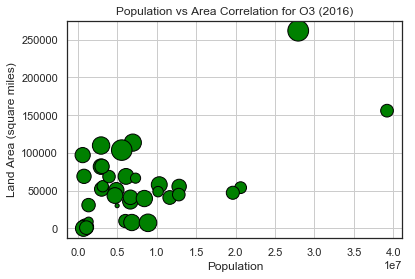

In [131]:
plt.scatter(x.values, 
            y.values, 
            s*10, c="green", 
            edgecolor="black", linewidths=1, marker="o")


plt.title("Population vs Area Correlation for O3 (2016)")
plt.ylabel("Land Area (square miles)")
plt.xlabel("Population")
plt.grid(True)

plt.savefig("Resources/O3_pop_vs_area.png")

#plt.text(10,30, "Note:\nState Population and Land Area does not direclty correlate with Air Quality")

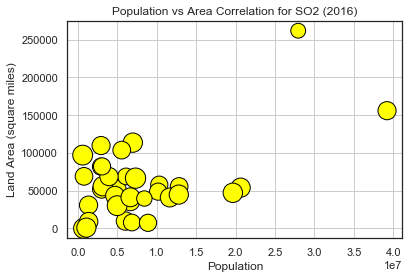

In [132]:
plt.scatter(xs.values, 
            ys.values, 
            ss*10, c="yellow", 
            edgecolor="black", linewidths=1, marker="o")


plt.title("Population vs Area Correlation for SO2 (2016)")
plt.ylabel("Land Area (square miles)")
plt.xlabel("Population")
plt.grid(True)

plt.savefig("Resources/SO2_pop_vs_area.png")

In [134]:
#CO data
CO_data = df[["State", "County", "City","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI", "Date Local","year"
                  ]]
state_CO_data = CO_data.groupby(['State']).mean()
state_CO_data

,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
State,,,,,
Alabama,0.212607,0.407386,9.446257,3.850288,2014.725528
Alaska,0.423438,0.677599,10.138804,6.528340,2014.637285
Arizona,0.490616,0.982476,9.511755,9.191023,2007.698024
Arkansas,0.422393,0.558514,7.939375,5.929914,2011.673610
California,0.447485,0.769284,7.430949,7.405669,2007.483221
Colorado,0.443112,0.814280,8.691912,7.724205,2009.411504
Connecticut,0.250866,0.366647,8.229045,3.586407,2011.298400
Delaware,0.261600,0.401025,8.929477,3.839384,2012.819284
District Of Columbia,0.790170,1.125385,9.308608,11.605105,2008.048490


In [136]:
state_co_group = state_CO_data.loc[:,["CO AQI"]]

state_CO_high = state_co_group.sort_values('CO AQI', ascending=False)
state_CO_low = state_co_group.sort_values('CO AQI', ascending=True)


co_high = state_CO_high.head(5)
co_low = state_CO_low.head(5)



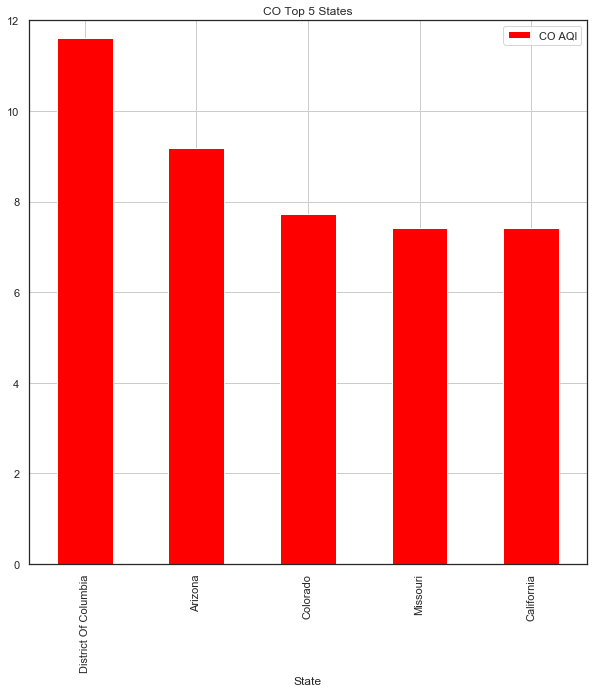

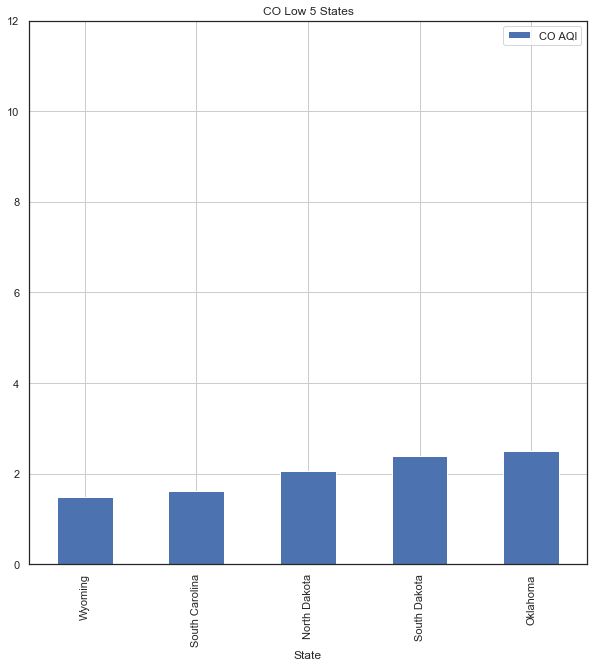

In [139]:
co_high.plot(kind="bar", grid=True, figsize=(10,10),
              title="CO Top 5 States", color='red', ylim=(0, 12))
co_low.plot(kind="bar", grid=True, figsize=(10,10),
              title="CO Low 5 States", ylim=(0, 12))
#plt.savefig("Resources/CO_state_5.png")


plt.show()

In [140]:
state_so2_data = SO2_data.groupby(['State']).mean()

state_so2_group = state_so2_data.loc[:,["SO2 AQI"]]

top_state_so2 = state_so2_group.sort_values("SO2 AQI", ascending=False)
low_state_so2 = state_so2_group.sort_values("SO2 AQI", ascending=True)

so2_high = top_state_so2.head(5)
so2_low = low_state_so2.head(5)

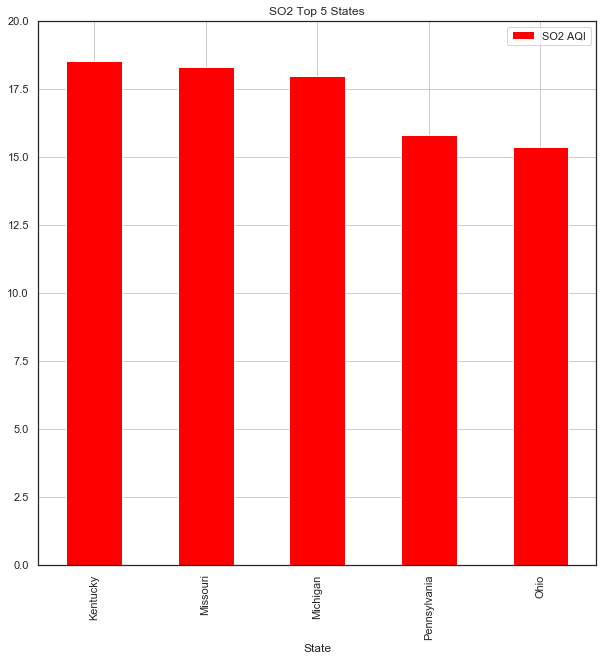

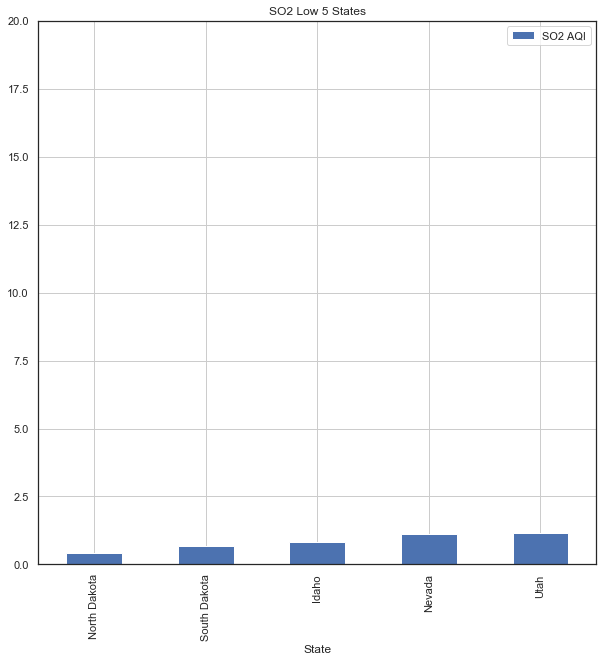

In [142]:
so2_high.plot(kind="bar", grid=True, figsize=(10,10),
              title="SO2 Top 5 States", color='red', ylim=(0, 20))
so2_low.plot(kind="bar", grid=True, figsize=(10,10),
              title="SO2 Low 5 States", ylim=(0, 20))

plt.show()

#plt.savefig("Resources/SO2_state_5.png")

In [144]:
state_o3_data = O3_data.groupby(['State']).mean()

state_o3_group = state_o3_data.loc[:,["O3 AQI"]]

top_state_o3 = state_o3_group.sort_values("O3 AQI", ascending=False)
low_state_o3 = state_o3_group.sort_values("O3 AQI", ascending=True)

o3_high = top_state_o3.head(5)
o3_low = low_state_o3.head(5)


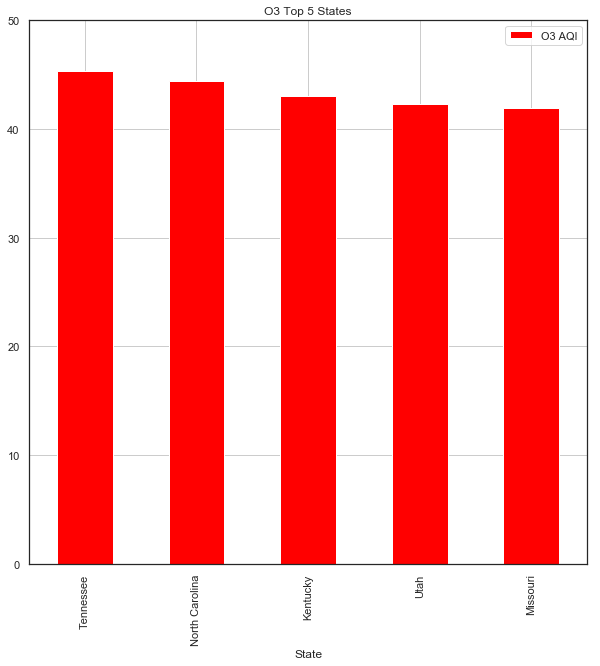

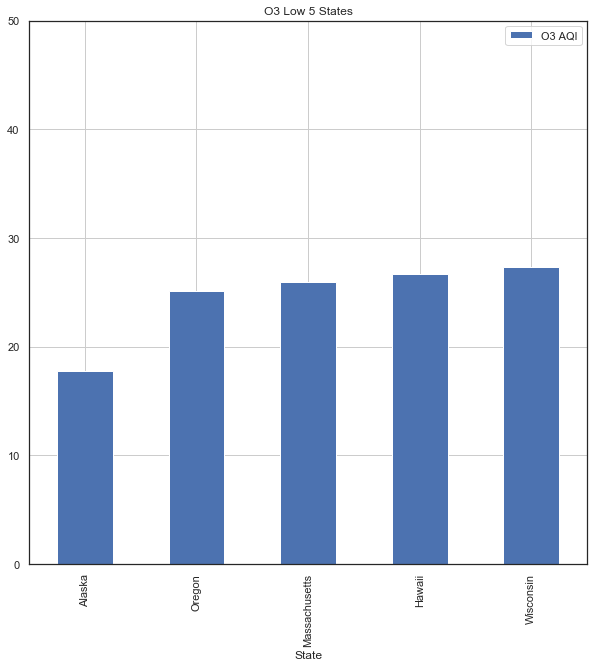

In [146]:
#plt.subplots(1,2, figsize=[15,5])

o3_high.plot(kind="bar", grid=True, figsize=(10,10),
              title="O3 Top 5 States", color='red', ylim=(0, 50))
o3_low.plot(kind="bar", grid=True, figsize=(10,10),
              title="O3 Low 5 States", ylim=(0, 50))

#plt.savefig("Resources/O3_state_5.png")

plt.show()



In [147]:
state_no2_data = NO2_data.groupby(['State']).mean()

state_no2_group = state_no2_data.loc[:,["NO2 AQI"]]

top_state_no2 = state_no2_group.sort_values("NO2 AQI", ascending=False)
low_state_no2 = state_no2_group.sort_values("NO2 AQI", ascending=True)

no2_high = top_state_no2.head(5)
no2_low = low_state_no2.head(5)


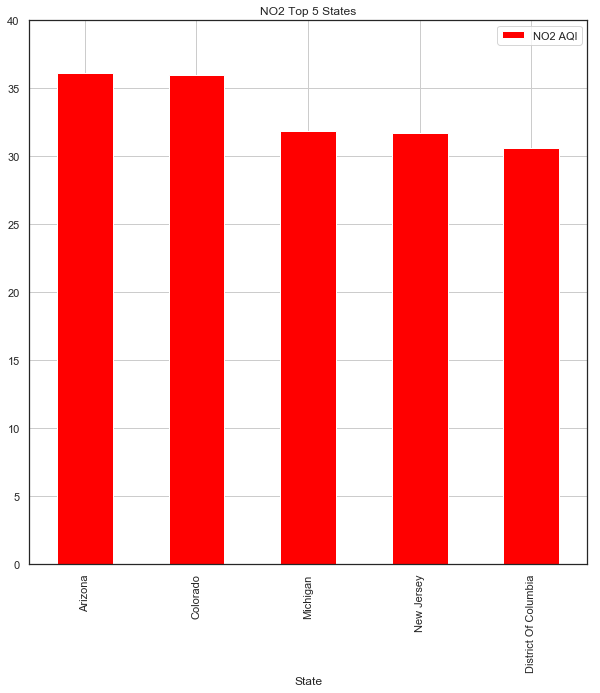

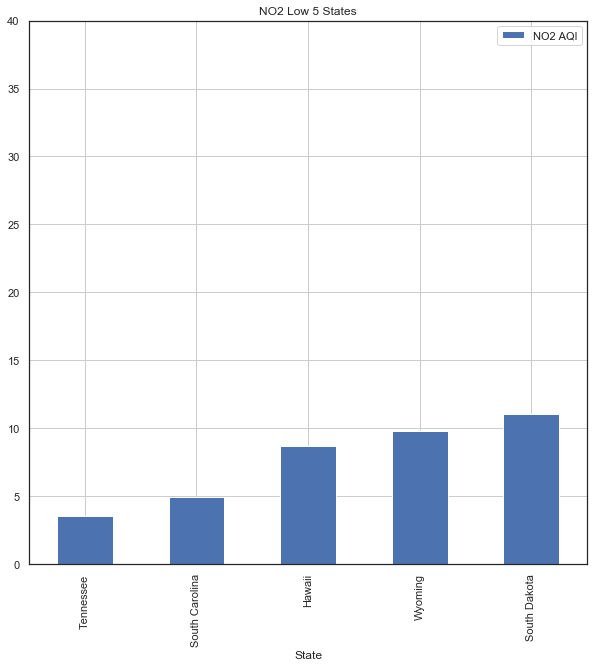

In [149]:
no2_high.plot(kind="bar", grid=True, figsize=(10,10),
              title="NO2 Top 5 States", color='red', ylim=(0, 40))
no2_low.plot(kind="bar", grid=True, figsize=(10,10),
              title="NO2 Low 5 States", ylim=(0, 40))

#plt.savefig("Resources/NO2_state_5.png")

plt.show()